Certainly! Below is an example of the **Brown-Durbin-Evans CUSUM Test on Recursive Residuals** with the formulas formatted using `$$` and `$` as requested.

---

### Example: Brown-Durbin-Evans CUSUM Test

Suppose we have a simple linear regression model:

$$
y_t = \beta_0 + \beta_1 x_t + \epsilon_t, \quad t = 1, 2, \dots, T
$$

where:
- $y_t$ is the dependent variable at time $t$,
- $x_t$ is the independent variable at time $t$,
- $\beta_0$ and $\beta_1$ are the regression coefficients,
- $\epsilon_t$ is the error term.

We want to test for structural changes in the regression parameters using the Brown-Durbin-Evans CUSUM test.

---

### Step 1: Compute Recursive Residuals

Start by estimating the regression model using the first $k$ observations (where $k$ is the number of parameters, e.g., $k = 2$ for $\beta_0$ and $\beta_1$). Then, for each additional observation $t = k+1, k+2, \dots, T$, compute the recursive residual $w_t$:

$$
w_t = \frac{y_t - \hat{y}_t}{\sqrt{1 + \mathbf{x}_t' (\mathbf{X}_{t-1}' \mathbf{X}_{t-1})^{-1} \mathbf{x}_t}}
$$

where:
- $\hat{y}_t = \mathbf{x}_t' \hat{\boldsymbol{\beta}}_{t-1}$ is the predicted value of $y_t$ using the estimated coefficients from the first $t-1$ observations,
- $\mathbf{x}_t = [1, x_t]$ is the vector of independent variables at time $t$,
- $\mathbf{X}_{t-1}$ is the design matrix for the first $t-1$ observations.

---

### Step 2: Standardize Recursive Residuals

Standardize the recursive residuals to have zero mean and unit variance:

$$
\tilde{w}_t = \frac{w_t}{\hat{\sigma}}
$$

where $\hat{\sigma}$ is the estimated standard deviation of the residuals.

---

### Step 3: Compute the CUSUM Statistic

Calculate the cumulative sum (CUSUM) of the standardized recursive residuals:

$$
S_t = \sum_{j=k+1}^t \tilde{w}_j, \quad t = k+1, k+2, \dots, T
$$

---

### Step 4: Compute the CUSUM Test Statistic

Normalize the CUSUM statistic by dividing by the standard deviation and the square root of the degrees of freedom:

$$
C_t = \frac{S_t}{\hat{\sigma} \sqrt{T - k}}
$$

---

### Step 5: Compare to Critical Values

The CUSUM test statistic $C_t$ is compared to critical values to determine if there is evidence of a structural change. For a significance level $\alpha = 0.05$, the critical bounds are typically:

$$
\text{Upper Bound} = a \sqrt{T - k} + b t,
$$
$$
\text{Lower Bound} = -a \sqrt{T - k} - b t,
$$

where $a$ and $b$ are constants that depend on the significance level.

---

### Example Calculation

Suppose we have the following data for $T = 10$ observations:

| $t$ | $x_t$ | $y_t$ |
|-----|-------|-------|
| 1   | 1.0   | 2.0   |
| 2   | 1.5   | 3.0   |
| 3   | 2.0   | 4.0   |
| 4   | 2.5   | 5.0   |
| 5   | 3.0   | 6.0   |
| 6   | 3.5   | 7.0   |
| 7   | 4.0   | 8.0   |
| 8   | 4.5   | 9.0   |
| 9   | 5.0   | 10.0  |
| 10  | 5.5   | 11.0  |

1. Estimate the regression model using the first $k = 2$ observations.
2. Compute recursive residuals $w_t$ for $t = 3, 4, \dots, 10$.
3. Standardize the recursive residuals $\tilde{w}_t$.
4. Compute the CUSUM statistic $S_t$.
5. Compute the CUSUM test statistic $C_t$.
6. Compare $C_t$ to the critical bounds.

---

### Step 6: Interpretation

- If $C_t$ crosses the upper or lower critical bounds, reject the null hypothesis of parameter stability (evidence of a structural change).
- If $C_t$ remains within the bounds, do not reject the null hypothesis.

---

This example illustrates the steps and formulas for the Brown-Durbin-Evans CUSUM Test. Let me know if you need further clarification or help with calculations!

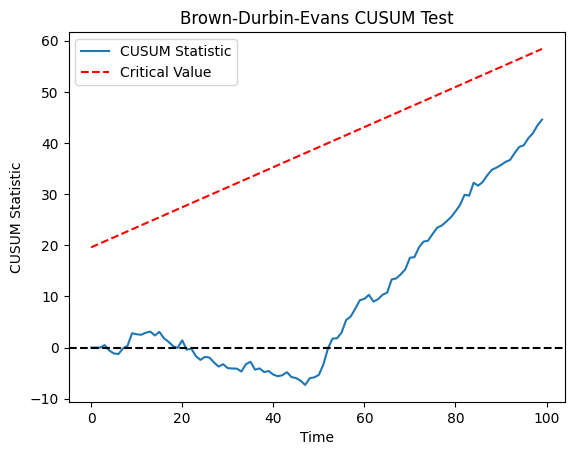

In [7]:
# Fixing the singular matrix issue by adding a small regularization term
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm  # Corrected import

def brown_durbin_evans_test1(y, X, alpha=0.05, reg_param=1e-5):
    n = len(y)
    recursive_residuals = np.zeros(n)
    sigma_sq = 0
    
    # Calculate recursive residuals with regularization
    for k in range(1, n):
        X_k = X[:k]
        y_k = y[:k]
        
        # Add regularization to prevent singular matrix
        XTX = np.dot(X_k.T, X_k)
        reg_matrix = reg_param * np.eye(XTX.shape[0])
        XTX_inv = np.linalg.inv(XTX + reg_matrix)
        
        model = sm.OLS(y_k, X_k)
        results = model.fit()
        x_k = X[k]
        y_pred = np.dot(x_k, results.params)
        recursive_residuals[k] = (y[k] - y_pred) / np.sqrt(1 + np.dot(x_k.T, np.dot(XTX_inv, x_k)))
    
    # Calculate CUSUM statistics
    sigma = np.std(recursive_residuals)
    cusum = np.cumsum(recursive_residuals) / sigma
    
    # Critical values
    t = np.arange(n) / n
    critical = np.sqrt(n) * (1 + 2 * t)
    critical *= norm.ppf(1 - alpha/2)
    
    return cusum, critical

# Example usage
np.random.seed(42)
n = 100
X = np.column_stack([np.ones(n), np.random.normal(size=(n, 2))])
beta = np.array([1, 0.5, -0.3])
y = np.dot(X, beta) + np.random.normal(size=n)

# Introduce structural break at t=50
y[50:] += 2

cusum, critical = brown_durbin_evans_test1(y, X)

# Plot results
import matplotlib.pyplot as plt
plt.plot(cusum, label='CUSUM Statistic')
plt.plot(critical, 'r--', label='Critical Value')
plt.axhline(0, color='black', linestyle='--')
plt.title('Brown-Durbin-Evans CUSUM Test')
plt.xlabel('Time')
plt.ylabel('CUSUM Statistic')
plt.legend()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

START_DATE = '2000-01-01'
END_DATE = pd.to_datetime('today')
TICKER = '^GSPC'

data = yf.download(
    TICKER,
    start = START_DATE,
    end = END_DATE,
    interval = '1d',
    progress = False
)

In [2]:
ret = data['Close'].pct_change().dropna()

ret.head(3)

Ticker,^GSPC
Date,
2000-01-04,-0.038345
2000-01-05,0.001922
2000-01-06,0.000956


 In Chapter 2, we introduced the CUSUM filter. At that time, it was applied in the context of event-based bar extraction. The idea was to extract bars when a certain variable, such as cumulative prediction error, exceeded a predetermined threshold. This concept can be extended to test for structural changes.

#### 1. Brown-Durbin-Evans CUSUM Test on Recursive Residuals

This test was proposed by Brown-Durbin-Evans (1975). It uses an array of features $x_t$ that predict the value $y_t$ for all observations $t = 1,\dots, T$. The matrix $X_t$ is constructed from the time series of features for $t \leq T, \{x_i\}_{i, \dots, t}$. Brown-Durbin-Evans calculated the recursive least squares estimates of $\beta$ in the following setting.

$$y_t = \beta_t^\prime x_t + \epsilon_t$$

This generates $T-k$ least squares estimates $(\hat{\beta}_{k+1},\dots, \hat{\beta}_{T})$ by fitting on subsamples $([1, k+1], [1, k+2], \dots, [1, T])$. Here, the standardized one-step-ahead recursive residuals can be calculated as follows.

$$\hat{\omega}_t = \frac{y_t - \hat{\beta}_{t - 1}x_t}{\sqrt{f_t}}$$
$$f_t = \hat{\sigma}_{\epsilon}^2 \left[ 1 + x_t^{\prime} (X_t ^{\prime} X_t)^{-1} x_t\right] $$

The CUSUM statistic can be defined as follows:

$$S_t = \sum_{j = k+1}^t \frac{\hat{\omega}_j}{\hat{\sigma}_{\omega}}$$
$$\hat{\sigma}_{\omega}^2 = \frac{1}{T-k} \sum_{t=k}^T (\hat{\omega}_t - E[\hat{\omega}_t])^2$$

Under the null hypothesis $H_0 : \beta_t = \beta$ where $\beta$ is a specific constant value, $S_t \sim N[0, t - k - 1]$. One drawback of this procedure is that since the starting point is arbitrarily chosen, the results may not be consistent.

In [7]:
class OneSideBrownDurbinEvans :
    def __init__(self, delta, h = None):
        self.delta = delta
        self.h = h
        self.G_list = None
        self.S_list = None
        self.G_min_idx = None
        self.cpd_idx = None
        
    def mean(self, x, k):
        if k == 0 : return x[k]
        return np.mean(x[:k])

    def var(self, x, k):
        return np.var(x[:k])
    
    def get_s_unknown(self, x, k, mul, delta, sigma):
        temp = (delta / sigma) * (x.iloc[k] - mul - 0.5 * delta)
        return temp.values
    
    def get_change_point(self, signal):
        G_list = []
        S_list = []
        G = 0
        S = 0
        delta = self.delta
        for k in range(len(signal)) :
            if k == 0:
                sigma = 1
                mul = 0
            else :
                mul = self.mean(signal, k + 1)
                sigma = self.var(signal, k + 1)
            s = self.get_s_unknown(signal, k, mul, delta, sigma)
            test = G + s
            G = np.max(np.append(G + s, 0))
            S = S + s
            G_list.append(G)
            S_list.append(S)
        
        self.G_list = G_list
        self.S_list = S_list
        if self.h is not None :
            self.G_min_idx = np.min(np.where(np.array(G_list) > self.h)[0])
            target_S_list = S_list[:self.G_min_idx]
            self.cpd_idx = target_S_list.index(min(target_S_list))
        return self

In [8]:
osc = OneSideBrownDurbinEvans(delta = ret.median(), h = None).get_change_point(ret)

/opt/quantfree/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


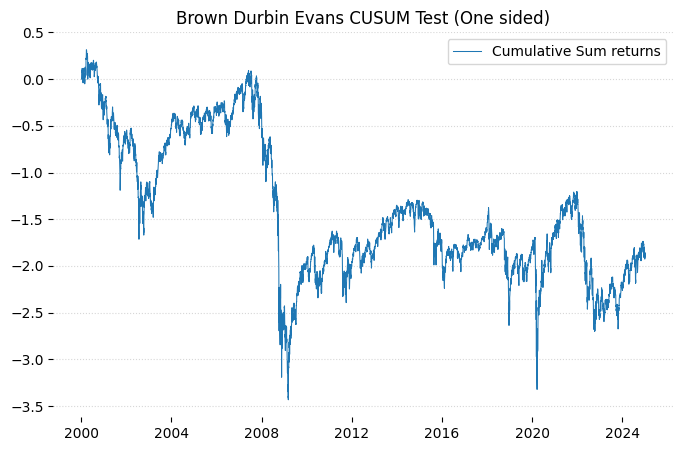

In [9]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    pd.Series(
        osc.S_list,
        index = ret.index
    ),
    label = 'Cumulative Sum returns',
    lw = 0.75
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Brown Durbin Evans CUSUM Test (One sided)')
plt.show()

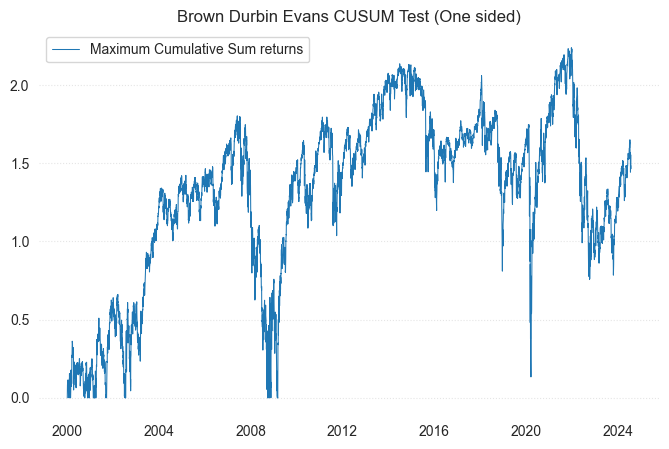

In [162]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    pd.Series(
        osc.G_list,
        index = ret.index
    ),
    label = 'Maximum Cumulative Sum returns',
    lw = 0.75
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Brown Durbin Evans CUSUM Test (One sided)')
plt.show()

In [163]:
class TwoSidedBrownDurbinEvans :
    def __init__(self, delta, h=None):
        self.delta = delta
        self.h = h
        self.G_increase_list = None
        self.S_increase_list = None
        self.G_decrease_list = None
        self.S_decrease_list = None
        self.G_increase_min_idx = None
        self.increase_cpd_idx = None
        self.G_decrease_min_idx = None
        self.decrease_cpd_idx = None
 
    def mean(self, x, k):
        if k == 0:
            return x[k]
        return np.mean(x[:k])
    
    def var(self, x, k):
        return np.var(x[:k])
    
    def get_s_unknown(self, x, k, mu1, delta, sigma, sign):
        delta = abs(self.delta)
        if sign == 1:
            temp = (delta/sigma)*(x.iloc[k] - mu1 - 0.5*delta)
        else:
            temp = -(delta/sigma)*(x.iloc[k] - mu1 + 0.5*delta)
        return temp
    
    def get_change_point(self, signal):
        G_increase_list = []
        S_increase_list = []
        G_decrease_list = []
        S_decrease_list = []
 
        G_i = 0
        S_i = 0
        G_d = 0
        S_d = 0
        delta = abs(self.delta)
        for k in range(len(signal)):
            if k == 0:
                sigma = 1
                mu1 = 0
            else:
                mu1 = self.mean(signal, k+1)
                sigma = self.var(signal, k+1)
            s_i = self.get_s_unknown(signal, k, mu1, delta, sigma, 1)
            s_d = self.get_s_unknown(signal, k, mu1, delta, sigma, -1)
            G_i = np.max([G_i+s_i, 0])
            G_d = np.max([G_d+s_d, 0])
            S_i += s_i
            S_d += s_d
            G_increase_list.append(G_i)
            S_increase_list.append(S_i)
            G_decrease_list.append(G_d)
            S_decrease_list.append(S_d)
            
        self.G_increase_list = G_increase_list
        self.S_increase_list = S_increase_list
        self.G_decrease_list = G_decrease_list
        self.S_decrease_list = S_decrease_list
        if self.h is not None:
            self.G_increase_min_idx = np.min(np.where(np.array(G_increase_list) > self.h)[0])
            target_S_increase_list = S_increase_list[:self.G_increase_min_idx]
            self.increase_cpd_idx = target_S_increase_list.index(min(target_S_increase_list))
 
            self.G_decrease_min_idx = np.min(np.where(np.array(G_decrease_list) > self.h)[0])
            target_S_decrease_list = S_decrease_list[:self.G_decrease_min_idx]
            self.decrease_cpd_idx = target_S_decrease_list.index(min(target_S_decrease_list))
        return self

In [164]:
tsc = TwoSidedBrownDurbinEvans(delta = ret.median(), h = None).get_change_point(ret)

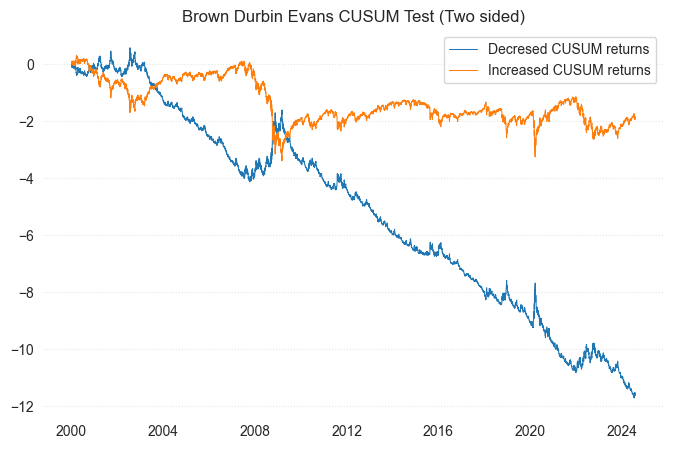

In [165]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    pd.Series(
        tsc.S_decrease_list,
        index = ret.index
    ),
    label = 'Decresed CUSUM returns',
    lw = 0.75
)
ax.plot(
    pd.Series(
        tsc.S_increase_list,
        index = ret.index
    ),
    label = 'Increased CUSUM returns',
    lw = 0.75
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Brown Durbin Evans CUSUM Test (Two sided)')
plt.show()

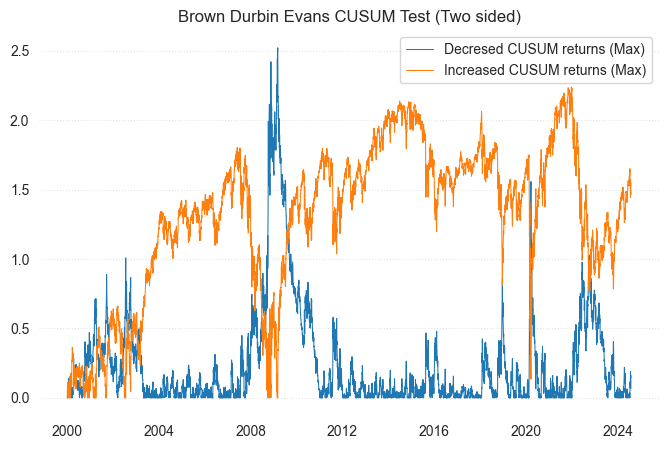

In [166]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    pd.Series(
        tsc.G_decrease_list,
        index = ret.index
    ),
    label = 'Decresed CUSUM returns (Max)',
    lw = 0.75
)
ax.plot(
    pd.Series(
        tsc.G_increase_list,
        index = ret.index
    ),
    label = 'Increased CUSUM returns (Max)',
    lw = 0.75
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Brown Durbin Evans CUSUM Test (Two sided)')
plt.show()

#### 2. Chu-Stinchcombe-White CUSUM Test on Levels
# 
This test follows the paper by Homm & Breitung (2012). It simplifies the previous technique by removing $\{x_t\}_{t = 1,..., T}$ and assuming $H_0: \beta_t = 0$, that is, predicting no change. This method can work directly with $y_t$ levels, reducing computational burden. Here, we calculate the standardized deviation of log price $y_t$ compared to log price $y_n$ ($t > n$) as follows.

$$S_{n,t} = (y_t - y_n) (\hat{\sigma}_t \sqrt{t - n})^{-1}$$
$$\hat{\sigma}_t^2 = (t - 1)^{-1} \sum_{i=2}^t (\Delta y_i)^2$$

Under the null hypothesis $H_0: \beta_t = 0$, $S_{n,t} \sim N(0, 1)$. The time-dependent critical value for one-sided test is:

$$c_{\alpha}(n, t) = \sqrt{b_{\alpha} + \log(t - n)}$$

Homm & Breitung derived $b_{\alpha=0.05} = 4.6$ through Monte Carlo simulation. One drawback of this technique is that the reference level $y_n$ is somewhat arbitrarily set. To address this issue, one could estimate $S_{n,t}$ over a backward-shifting window $n \in (1, t)$ and select $S_t = \sum_{n \in (1, t)} \{S_{n,t}\}$.



In [172]:
from quant_free.finml.regime_change.cusum_test import get_chu_stinchcombe_white_statistics

csw_one_side = get_chu_stinchcombe_white_statistics(
    series = np.log(data['Close']),
    test_type = 'one_sided',
    num_threads = 8
)

2024-08-02 00:37:15.944902 100.0% get_s_n_for_t done after 2.16 minutes. Remaining 0.0 minutes.


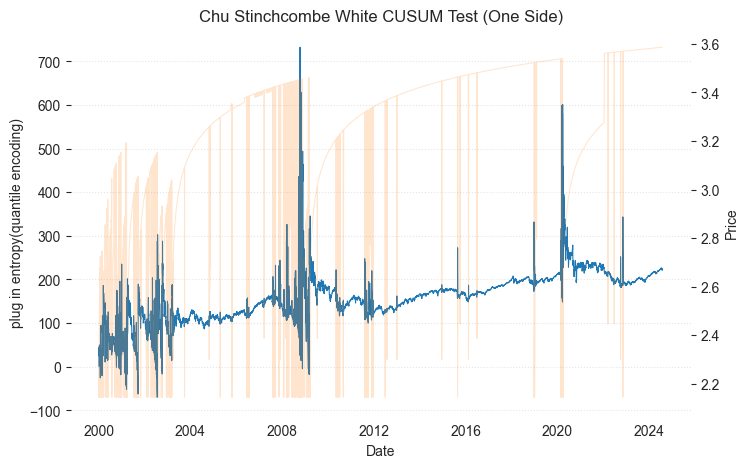

In [176]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(
    csw_one_side['stat'],
    lw = 0.75
)
ax1.set_xlabel('Date') 
ax1.set_ylabel('plug in entropy(quantile encoding)') 
ax1.grid(False)
ax1.yaxis.grid(True, ls=':', alpha=0.5)
for spine in ax1.spines.values():
    spine.set_visible(False)

ax2 = ax1.twinx() 
ax2.plot(
    csw_one_side['critical_value'],
    color = 'tab:orange',
    lw = 0.75,
    alpha = 0.2
)
ax2.grid(False)
ax2.set_ylabel('Price') 
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.xticks(rotation = 45)
plt.title('Chu Stinchcombe White CUSUM Test (One Side)')
plt.show()

In [175]:
csw_two_side = get_chu_stinchcombe_white_statistics(
    series = np.log(data['Close']),
    test_type = 'two_sided',
    num_threads = 8
)

024-08-02 00:40:32.645300 50.0% get_s_n_for_t done after 1.19 minutes. Remaining 1.19 minutes.2024-08-02 00:41:02.634833 75.0% get_s_n_for_t done after 1.69 minutes. Remaining 0.56 minutes.2024-08-02 00:41:28.570194 100.0% get_s_n_for_t done after 2.12 minutes. Remaining 0.0 minutes.


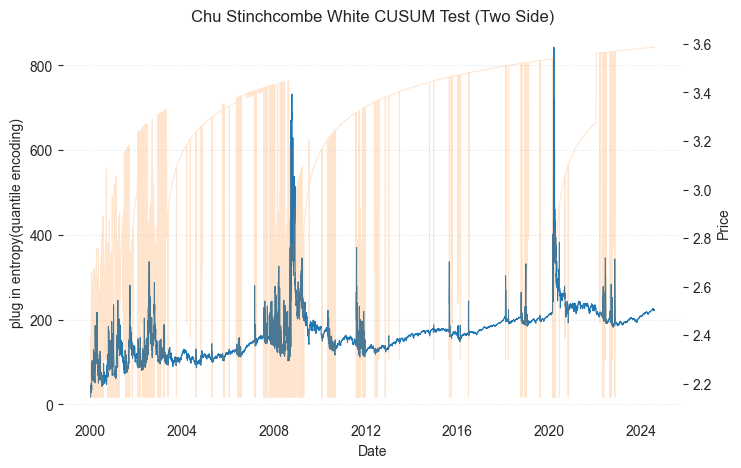

In [177]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(
    csw_two_side['stat'],
    lw = 0.75
)
ax1.set_xlabel('Date') 
ax1.set_ylabel('plug in entropy(quantile encoding)') 
ax1.grid(False)
ax1.yaxis.grid(True, ls=':', alpha=0.5)
for spine in ax1.spines.values():
    spine.set_visible(False)

ax2 = ax1.twinx() 
ax2.plot(
    csw_two_side['critical_value'],
    color = 'tab:orange',
    lw = 0.75,
    alpha = 0.2
)
ax2.grid(False)
ax2.set_ylabel('Price') 
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.xticks(rotation = 45)
plt.title('Chu Stinchcombe White CUSUM Test (Two Side)')
plt.show()
